## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  68.723979   539.350759  0.022774   4.981031  0.198643
1  63.680123   183.731913  0.274594   3.486084  0.490842
2   8.381145  1478.744595  0.646630   3.372776  1.699486
3  87.110768  1755.052758  0.502090   9.967531  1.618161
4  81.163753   709.292411  0.254920  10.374023  1.229150


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9847926	total: 68.8ms	remaining: 1m 8s
1:	learn: 0.9728663	total: 69.3ms	remaining: 34.6s
2:	learn: 0.9646297	total: 69.8ms	remaining: 23.2s
3:	learn: 0.9540505	total: 70.2ms	remaining: 17.5s
4:	learn: 0.9431904	total: 70.7ms	remaining: 14.1s
5:	learn: 0.9331426	total: 71.1ms	remaining: 11.8s
6:	learn: 0.9213644	total: 71.5ms	remaining: 10.1s
7:	learn: 0.9101125	total: 72ms	remaining: 8.93s
8:	learn: 0.9017629	total: 72.6ms	remaining: 8s
9:	learn: 0.8938992	total: 73.1ms	remaining: 7.24s
10:	learn: 0.8847786	total: 73.6ms	remaining: 6.61s
11:	learn: 0.8768578	total: 74ms	remaining: 6.09s
12:	learn: 0.8685877	total: 74.3ms	remaining: 5.64s
13:	learn: 0.8629597	total: 74.7ms	remaining: 5.26s
14:	learn: 0.8529923	total: 75.2ms	remaining: 4.94s
15:	learn: 0.8434892	total: 75.6ms	remaining: 4.65s
16:	learn: 0.8348384	total: 76ms	remaining: 4.39s
17:	learn: 0.8279071	total: 76.6ms	remaining: 4.18s
18:	learn: 0.8207306	total: 77ms	remaining: 3.97s
19:

87:	learn: 0.4631995	total: 107ms	remaining: 1.1s
88:	learn: 0.4599280	total: 107ms	remaining: 1.09s
89:	learn: 0.4567943	total: 107ms	remaining: 1.09s
90:	learn: 0.4543245	total: 108ms	remaining: 1.08s
91:	learn: 0.4509977	total: 108ms	remaining: 1.07s
92:	learn: 0.4478390	total: 109ms	remaining: 1.06s
93:	learn: 0.4445589	total: 109ms	remaining: 1.05s
94:	learn: 0.4416719	total: 110ms	remaining: 1.04s
95:	learn: 0.4384083	total: 110ms	remaining: 1.03s
96:	learn: 0.4353176	total: 110ms	remaining: 1.03s
97:	learn: 0.4326828	total: 111ms	remaining: 1.02s
98:	learn: 0.4299415	total: 111ms	remaining: 1.01s
99:	learn: 0.4262990	total: 112ms	remaining: 1s
100:	learn: 0.4225205	total: 112ms	remaining: 999ms
101:	learn: 0.4196690	total: 113ms	remaining: 993ms
102:	learn: 0.4168808	total: 113ms	remaining: 987ms
103:	learn: 0.4143806	total: 114ms	remaining: 981ms
104:	learn: 0.4121270	total: 114ms	remaining: 974ms
105:	learn: 0.4097717	total: 115ms	remaining: 968ms
106:	learn: 0.4072296	total: 

272:	learn: 0.1911454	total: 186ms	remaining: 496ms
273:	learn: 0.1906035	total: 187ms	remaining: 495ms
274:	learn: 0.1899897	total: 187ms	remaining: 493ms
275:	learn: 0.1894751	total: 187ms	remaining: 492ms
276:	learn: 0.1891007	total: 188ms	remaining: 490ms
277:	learn: 0.1887044	total: 188ms	remaining: 489ms
278:	learn: 0.1883415	total: 189ms	remaining: 488ms
279:	learn: 0.1878987	total: 189ms	remaining: 486ms
280:	learn: 0.1875918	total: 190ms	remaining: 485ms
281:	learn: 0.1870104	total: 190ms	remaining: 484ms
282:	learn: 0.1867567	total: 191ms	remaining: 483ms
283:	learn: 0.1862081	total: 191ms	remaining: 481ms
284:	learn: 0.1859595	total: 191ms	remaining: 480ms
285:	learn: 0.1852899	total: 192ms	remaining: 479ms
286:	learn: 0.1842655	total: 192ms	remaining: 477ms
287:	learn: 0.1838025	total: 193ms	remaining: 476ms
288:	learn: 0.1833464	total: 193ms	remaining: 475ms
289:	learn: 0.1828612	total: 194ms	remaining: 474ms
290:	learn: 0.1826065	total: 194ms	remaining: 473ms
291:	learn: 

510:	learn: 0.0977655	total: 288ms	remaining: 276ms
511:	learn: 0.0974213	total: 289ms	remaining: 275ms
512:	learn: 0.0972725	total: 289ms	remaining: 274ms
513:	learn: 0.0970040	total: 290ms	remaining: 274ms
514:	learn: 0.0966658	total: 290ms	remaining: 273ms
515:	learn: 0.0965222	total: 291ms	remaining: 272ms
516:	learn: 0.0962609	total: 291ms	remaining: 272ms
517:	learn: 0.0959284	total: 291ms	remaining: 271ms
518:	learn: 0.0957483	total: 292ms	remaining: 271ms
519:	learn: 0.0954217	total: 292ms	remaining: 270ms
520:	learn: 0.0952832	total: 293ms	remaining: 269ms
521:	learn: 0.0948854	total: 293ms	remaining: 269ms
522:	learn: 0.0947506	total: 294ms	remaining: 268ms
523:	learn: 0.0945001	total: 294ms	remaining: 267ms
524:	learn: 0.0941799	total: 294ms	remaining: 266ms
525:	learn: 0.0940047	total: 295ms	remaining: 266ms
526:	learn: 0.0936900	total: 295ms	remaining: 265ms
527:	learn: 0.0935600	total: 296ms	remaining: 264ms
528:	learn: 0.0933166	total: 296ms	remaining: 264ms
529:	learn: 

694:	learn: 0.0579548	total: 368ms	remaining: 161ms
695:	learn: 0.0576745	total: 368ms	remaining: 161ms
696:	learn: 0.0575392	total: 369ms	remaining: 160ms
697:	learn: 0.0573670	total: 369ms	remaining: 160ms
698:	learn: 0.0571993	total: 370ms	remaining: 159ms
699:	learn: 0.0569763	total: 370ms	remaining: 159ms
700:	learn: 0.0567784	total: 370ms	remaining: 158ms
701:	learn: 0.0565846	total: 371ms	remaining: 158ms
702:	learn: 0.0563119	total: 372ms	remaining: 157ms
703:	learn: 0.0561225	total: 372ms	remaining: 156ms
704:	learn: 0.0559769	total: 372ms	remaining: 156ms
705:	learn: 0.0557098	total: 373ms	remaining: 155ms
706:	learn: 0.0555810	total: 373ms	remaining: 155ms
707:	learn: 0.0555448	total: 374ms	remaining: 154ms
708:	learn: 0.0553864	total: 374ms	remaining: 154ms
709:	learn: 0.0553507	total: 374ms	remaining: 153ms
710:	learn: 0.0553154	total: 375ms	remaining: 152ms
711:	learn: 0.0550660	total: 375ms	remaining: 152ms
712:	learn: 0.0549258	total: 376ms	remaining: 151ms
713:	learn: 

933:	learn: 0.0311734	total: 470ms	remaining: 33.2ms
934:	learn: 0.0310779	total: 471ms	remaining: 32.7ms
935:	learn: 0.0310648	total: 471ms	remaining: 32.2ms
936:	learn: 0.0310067	total: 471ms	remaining: 31.7ms
937:	learn: 0.0309238	total: 472ms	remaining: 31.2ms
938:	learn: 0.0309108	total: 472ms	remaining: 30.7ms
939:	learn: 0.0308296	total: 472ms	remaining: 30.1ms
940:	learn: 0.0308169	total: 473ms	remaining: 29.6ms
941:	learn: 0.0308044	total: 473ms	remaining: 29.1ms
942:	learn: 0.0306990	total: 474ms	remaining: 28.6ms
943:	learn: 0.0306059	total: 474ms	remaining: 28.1ms
944:	learn: 0.0305936	total: 475ms	remaining: 27.6ms
945:	learn: 0.0305814	total: 475ms	remaining: 27.1ms
946:	learn: 0.0304900	total: 475ms	remaining: 26.6ms
947:	learn: 0.0304779	total: 476ms	remaining: 26.1ms
948:	learn: 0.0303881	total: 477ms	remaining: 25.6ms
949:	learn: 0.0303762	total: 477ms	remaining: 25.1ms
950:	learn: 0.0303644	total: 477ms	remaining: 24.6ms
951:	learn: 0.0302762	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

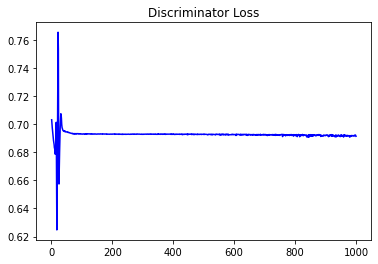

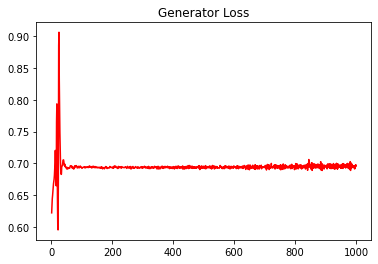

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.35235668435757456


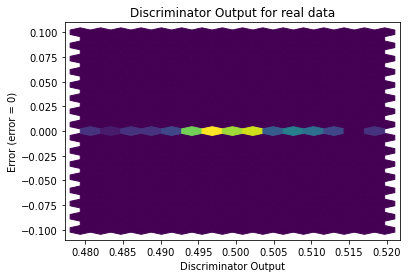

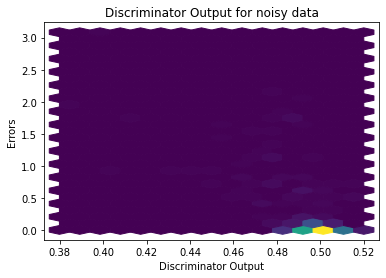

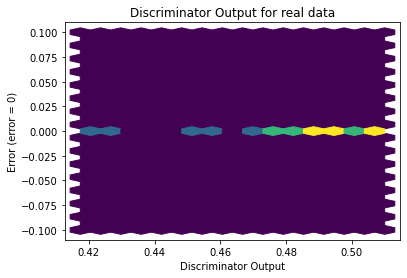

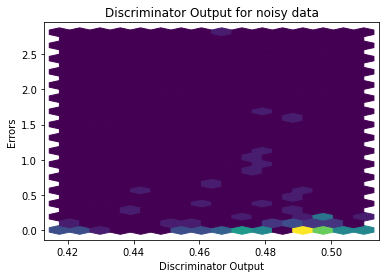

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


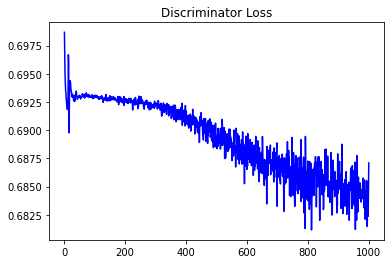

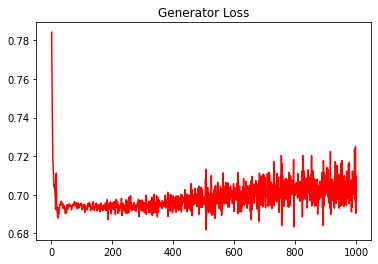

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.38939119844334474


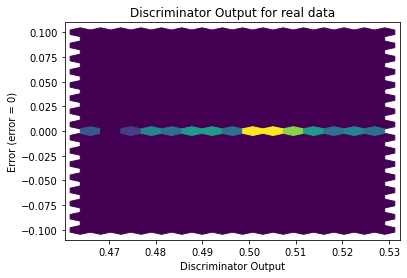

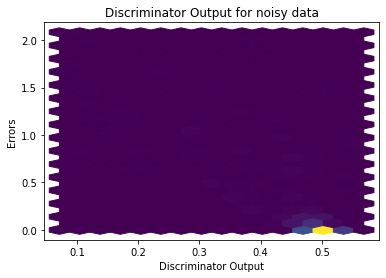

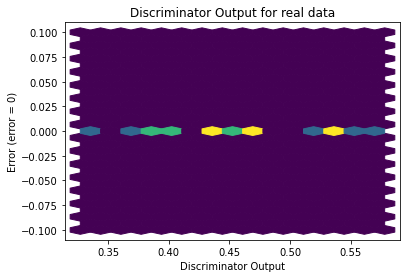

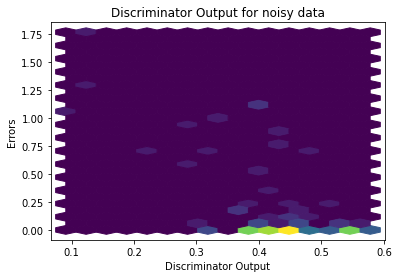

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0715]], requires_grad=True)
